In [91]:
import pandas as pd
import numpy as np
import os
import json
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# We will compare the time it takes to load files into pandas from a CSV file and Parquet

In [62]:
nrows = [1,2,10,50,100,1000,10000,10000,500000,1000000]
ncols = [1,2,4,8,16,32,64]

In [63]:
for c in ncols:
    for r in nrows:
        df = pd.DataFrame(np.random.normal(size=(r,c)))
        
        #Set the columns name
        df.columns = [f"Col_{i}" for i in range(c)]
        
        #save csv file
        df.to_csv(f'../data/{r}_{c}.csv', index=False)
        
        #save parquet file
        df.to_parquet(f'../data/{r}_{c}.parquet', engine='pyarrow', index=False, compression=None)

In [64]:
## Plotting the size on disk of parquet file vs csv file
size_ratio = {}
for c in ncols:
    size_ratio[f'{c}'] = []
    for r in nrows:
        size_ratio[f'{c}'].append(os.path.getsize(f'../data/{r}_{c}.parquet') / os.path.getsize(f'../data/{r}_{c}.csv'))



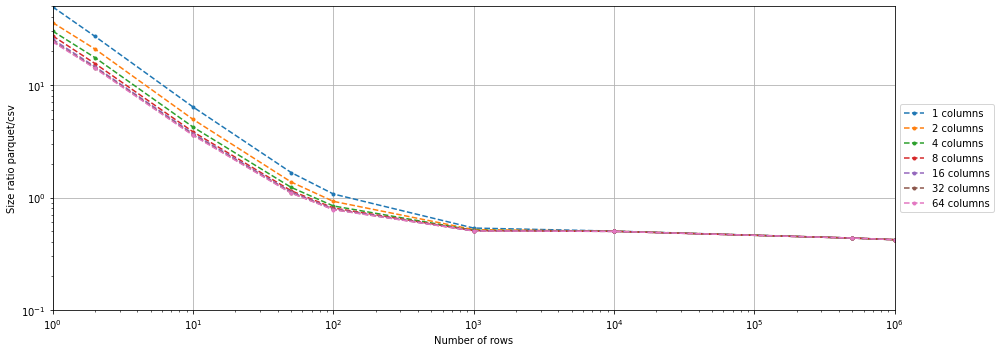

In [126]:

fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, size_ratio[f'{c}'], '.--')


#ax.axhline(y=0.42, color='k', linestyle='--')
ax.set_xlabel('Number of rows')
ax.set_ylabel('Size ratio parquet/csv')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.1,50])
ax.set_xlim([1.0,1e6])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
fig.savefig("../figs/size_ratio.png", dpi=fig.dpi)

In [66]:
## Loading the CSV or Parquet in memory

In [78]:
N = 500

def load_csv(c, r):
    pd.read_csv(f'../data/{r}_{c}.csv')

def load_parquet(c, r):
    pd.read_parquet(f'../data/{r}_{c}.parquet')

In [82]:
## Plotting the size on disk of parquet file vs csv file Takes a long time.
speed_ratio = {}
for c in ncols:
    speed_ratio[f'{c}'] = []
    for r in nrows:
        speed_ratio[f'{c}'].append(timeit.Timer(lambda: load_csv(c, r)).timeit(N) / timeit.Timer(lambda: load_parquet(c, r)).timeit(N))






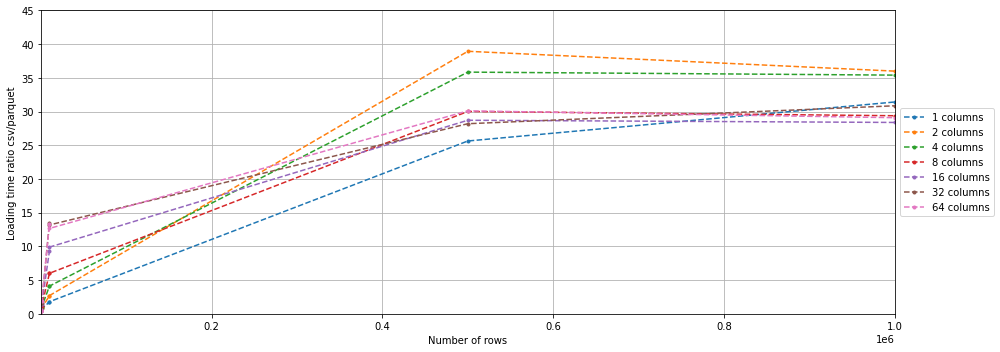

In [125]:

fig, ax = plt.subplots(figsize=(14, 5))
for c in ncols:
    ax.plot(nrows, speed_ratio[f'{c}'], '.--')

ax.set_xlabel('Number of rows')
ax.set_ylabel('Loading time ratio csv/parquet')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0,45])
ax.set_xlim([1,1e6])
ax.grid(True)
ax.legend([f"{c} columns" for c in ncols], loc='center left',  bbox_to_anchor=(1, 0.5))
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
plt.show()
fig.savefig("../figs/time_ratio.png", dpi=fig.dpi)


In [93]:
#Save analysis to disk

with open('../data/size.json', "w") as f:
    json.dump(size_ratio, f)

    
with open('../data/speed.json', "w") as f:
    json.dump(speed_ratio, f)


In [ ]:
## Repetition